In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%run utilities/lat_lon_ds.py

In [4]:
lat_lon_ds([41.948858,-87.657748],[41.974163,360-87.907321])

20879.836326723595

In [6]:
spray_df = pd.read_csv('./assets/input/spray.csv')

In [7]:
spray_df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [8]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


some null values for time.  That's too bad

In [24]:
spray_df[spray_df['Time'].isnull()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582
1037,2011-09-07,NaN,41.984836,-87.793998
1038,2011-09-07,NaN,41.984836,-87.794670
1039,2011-09-07,NaN,41.984884,-87.795198


In [38]:
import datetime as dt

Text(0,0.5,'Latitude')

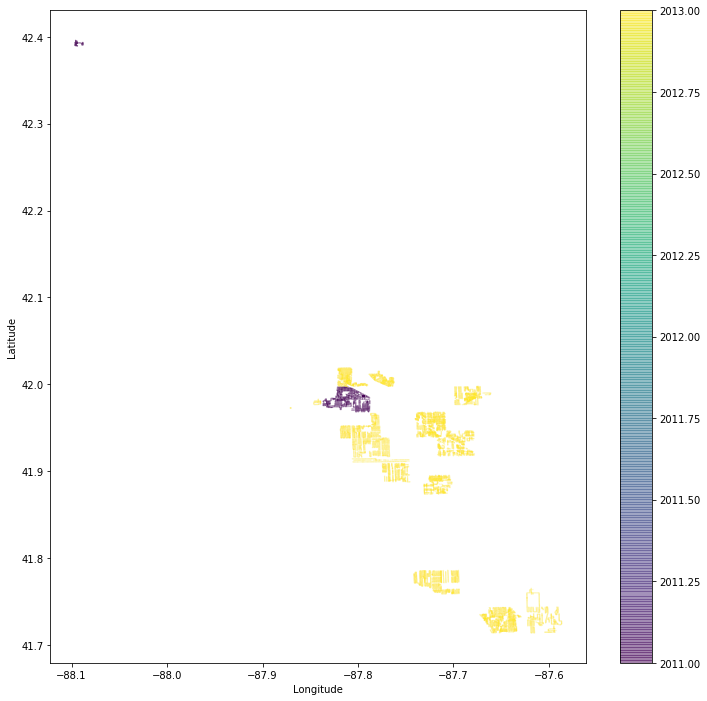

In [50]:
plt.figure(num=1, figsize=(12,12))
plt.scatter(spray_df.Longitude, spray_df.Latitude, marker='.', s=0.2,
            c = pd.to_datetime(spray_df.Date).map(lambda d: d.year),
           alpha = 0.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [51]:
def add_time_components(df):
    new_df = df.copy()
    new_df['DtDate'] = pd.to_datetime(new_df['Date'])
    new_df['Year'] = new_df['DtDate'].map(lambda d: d.year)
    new_df['Month'] = new_df['DtDate'].map(lambda d: d.month)
    new_df['Day'] = new_df['DtDate'].map(lambda d: d.day)
    return new_df

In [59]:
new_df = add_time_components(spray_df)
spray_df = new_df
del new_df

Text(0,0.5,'Latitude')

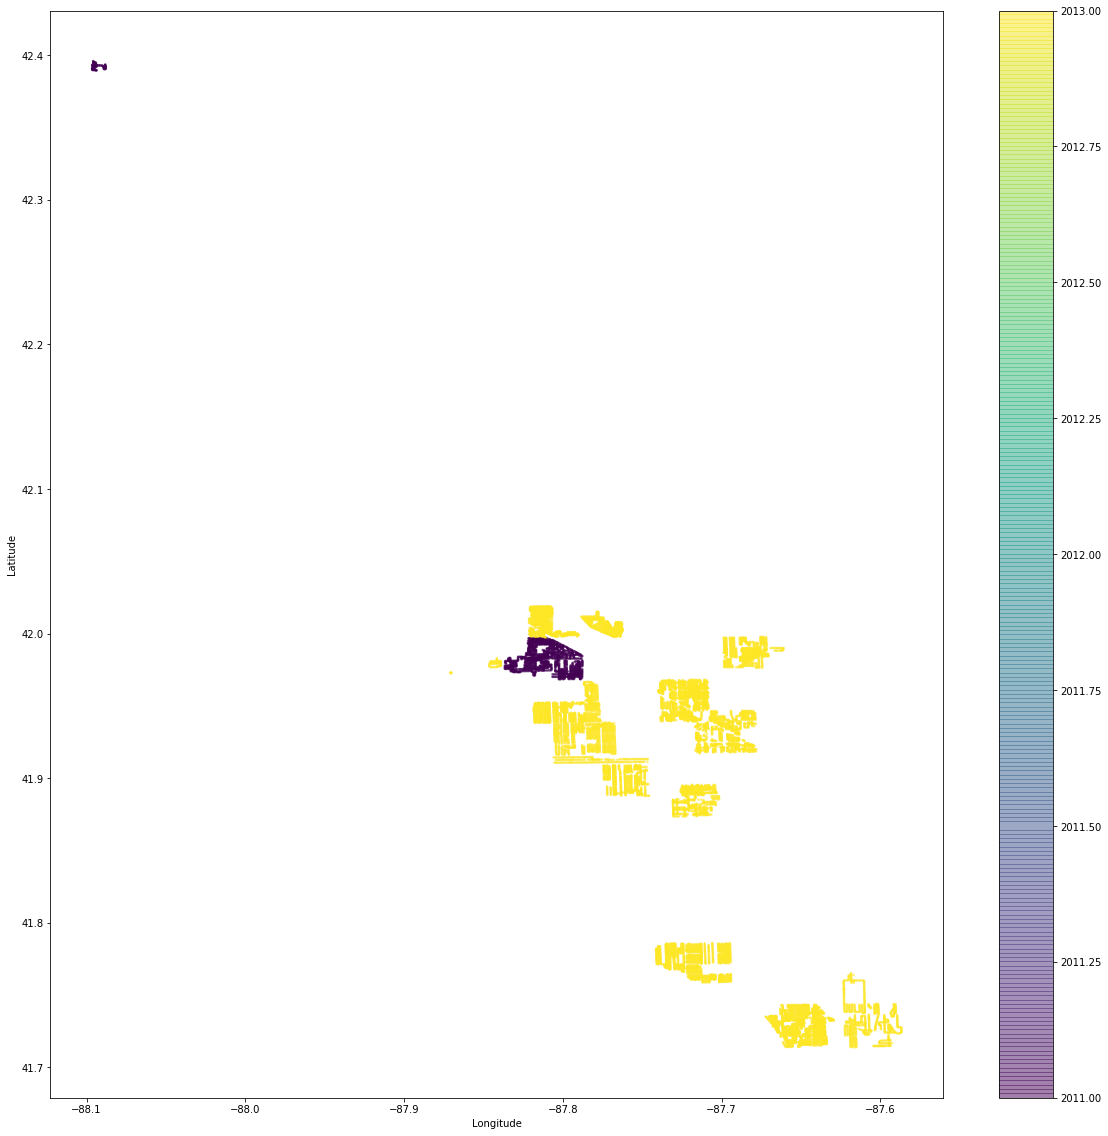

In [171]:
plt.figure(num=1, figsize=(20,20))
plt.scatter(spray_df.Longitude, spray_df.Latitude, marker='.', s=11,
            c = df.Year,alpha = 0.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [9]:
train_file = r'./assets/input/train.csv'
train_df = pd.read_csv(train_file)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [63]:
new_df = add_time_components(train_df)
train_df = new_df
del new_df

In [94]:
norm.pdf(0,1,1)

0.24197072451914337

In [139]:
from scipy.stats import norm

def delta_t(t_self, t_other):
    delta_t = t_self - t_other
    return delta_t.total_seconds()
    
def space_component(dx, spray_radius):    
    N = norm
    y = N.pdf(0, dx, spray_radius)
    return y
    
def time_component(dt, spray_time_lag):
    time_scale = 3600*24*2
    N = norm
    # peak effect is at t = -spray_time_lag
    # measure the effect at t = -dt, where dt is the (date trap tested - date sprayed)
    y = N.pdf(-1*dt, -1*spray_time_lag, time_scale)
    return y

In [140]:
def spray_effect_on_trap(trap_row, spray_df, spray_time_lag, spray_radius):

    
    """   
    def delta_t(t_self, t_other):
        delta_t = t_self - t_other
        return delta_t.total_seconds()
    
    def space_component(dx, spray_radius):
        from scipy.stats import norm
        N = norm
        y = N.pdf(0, dx, spray_radius)
        return y
    
    def time_component(dt, spray_time_lag):
        from scipy.stats import norm
        time_scale = 3600*24*2
        N = norm
        # peak effect is at t = -spray_time_lag
        # measure the effect at t = -dt, where dt is the (date trap tested - date sprayed)
        y = N.pdf(-1*dt, -1*spray_time_lag, time_scale)
        return y
    """

    """
    spray_effect = 0    
    for i in range(spray_df.shape[0]):
        spray_row = spray_df.iloc[i]
        ds = lat_lon_ds([spray_row.Latitude, spray_row.Longitude], [trap_row.Latitude, trap_row.Longitude])
        dt = delta_t(trap_row.DtDate, spray_row.DtDate)
        time_c = time_component(dt, spray_time_lag)
        space_c = space_component(ds, spray_radius)
        spray_effect += time_c + space_c
    """
    
    ds = spray_df.apply(lambda row: lat_lon_ds([row.Latitude, row.Longitude], [trap_row.Latitude, trap_row.Longitude]), axis=1)
    dt = spray_df.apply(lambda row: delta_t(trap_row.DtDate, row.DtDate), axis=1)
    time_c = dt.map(lambda dt: time_component(dt, spray_time_lag))
    space_c = ds.map(lambda ds: space_component(ds, spray_radius))
    spray_effect = np.sum(time_c * space_c)
    
    
    print ('For trap', trap_row.Trap, 'spray effect is {0:.2E}'.format(spray_effect))  
    return spray_effect

In [137]:
spray_effect_on_trap(train_df.loc[0], spray_df, 3600*24*7, 50)

For trap T002 spray effect is 0.00E+00


0.0

In [147]:
train_df.groupby('Year').count()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,DtDate,Month,Day
Year,,,,,,,,,,,,,,,
2007,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811,3811
2009,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249
2011,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054,2054
2013,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392


In [151]:
spray_df.groupby(['Year','Month']).count()

Date  Time  Latitude  Longitude  DtDate   Day
Year Month                                               
2011 8        95    95        95         95      95    95
     9      2114  1530      2114       2114    2114  2114
2013 7      3809  3809      3809       3809    3809  3809
     8      7893  7893      7893       7893    7893  7893
     9       924   924       924        924     924   924

In [142]:
train_df['SprayEffect'] = train_df.apply(lambda r: spray_effect_on_trap(r,spray_df, 7*24*3600, 50), axis=1)

For trap T002 spray effect is 0.00E+00
For trap T002 spray effect is 0.00E+00
For trap T007 spray effect is 0.00E+00
For trap T015 spray effect is 0.00E+00
For trap T015 spray effect is 0.00E+00
For trap T045 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T049 spray effect is 0.00E+00
For trap T050 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T091 spray effect is 0.00E+00
For trap T094 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T153 spray effect is 0.00E+00
For trap T159 spray effect is 0.00E+00
For trap T002 spray effec

For trap T054 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T011 spray effect is 0.00E+00
For trap T016 spray effect is 0.00E+00
For trap T019 spray effect is 0.00E+00
For trap T028 spray effect is 0.00E+00
For trap T028 spray effect is 0.00E+00
For trap T028 spray effect is 0.00E+00
For trap T089 spray effect is 0.00E+00
For trap T090 spray effect is 0.00E+00
For trap T090 spray effect is 0.00E+00
For trap T092 spray effect is 0.00E+00
For trap T135 spray effect is 0.00E+00
For trap T135 spray effect is 0.00E+00
For trap T135 spray effect is 0.00E+00
For trap T142 spray effect is 0.00E+00
For trap T142 spray effec

For trap T083 spray effect is 0.00E+00
For trap T083 spray effect is 0.00E+00
For trap T114 spray effect is 0.00E+00
For trap T114 spray effect is 0.00E+00
For trap T155 spray effect is 0.00E+00
For trap T002 spray effect is 0.00E+00
For trap T002 spray effect is 0.00E+00
For trap T002 spray effect is 0.00E+00
For trap T007 spray effect is 0.00E+00
For trap T007 spray effect is 0.00E+00
For trap T015 spray effect is 0.00E+00
For trap T015 spray effect is 0.00E+00
For trap T045 spray effect is 0.00E+00
For trap T045 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T049 spray effect is 0.00E+00
For trap T050 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effec

For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effect is 0.00E+00
For trap T115 spray effec

For trap T129 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T143 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T148 spray effect is 0.00E+00
For trap T153 spray effect is 0.00E+00
For trap T153 spray effect is 0.00E+00
For trap T153 spray effect is 0.00E+00
For trap T153 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T009 spray effect is 0.00E+00
For trap T011 spray effect is 0.00E+00
For trap T011 spray effect is 0.00E+00
For trap T011 spray effec

For trap T017 spray effect is 0.00E+00
For trap T017 spray effect is 0.00E+00
For trap T017 spray effect is 0.00E+00
For trap T044 spray effect is 0.00E+00
For trap T044 spray effect is 0.00E+00
For trap T044 spray effect is 0.00E+00
For trap T035 spray effect is 0.00E+00
For trap T035 spray effect is 0.00E+00
For trap T036 spray effect is 0.00E+00
For trap T036 spray effect is 0.00E+00
For trap T036 spray effect is 0.00E+00
For trap T039 spray effect is 0.00E+00
For trap T060 spray effect is 0.00E+00
For trap T060 spray effect is 0.00E+00
For trap T061 spray effect is 0.00E+00
For trap T061 spray effect is 0.00E+00
For trap T061 spray effect is 0.00E+00
For trap T061 spray effect is 0.00E+00
For trap T062 spray effect is 0.00E+00
For trap T062 spray effect is 0.00E+00
For trap T062 spray effect is 0.00E+00
For trap T062 spray effect is 0.00E+00
For trap T062 spray effect is 0.00E+00
For trap T065 spray effect is 0.00E+00
For trap T065 spray effect is 0.00E+00
For trap T065 spray effec

For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T107 spray effect is 0.00E+00
For trap T107 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T072 spray effect is 0.00E+00
For trap T072 spray effect is 0.00E+00
For trap T072 spray effect is 0.00E+00
For trap T072 spray effect is 0.00E+00
For trap T078 spray effect is 0.00E+00
For trap T078 spray effect is 0.00E+00
For trap T078 spray effect is 0.00E+00
For trap T097 spray effect is 0.00E+00
For trap T097 spray effect is 0.00E+00
For trap T099 spray effect is 0.00E+00
For trap T099 spray effec

For trap T045 spray effect is 0.00E+00
For trap T045 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T046 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T048 spray effect is 0.00E+00
For trap T049 spray effect is 0.00E+00
For trap T049 spray effect is 0.00E+00
For trap T050 spray effect is 0.00E+00
For trap T050 spray effect is 0.00E+00
For trap T054 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T086 spray effect is 0.00E+00
For trap T091 spray effect is 0.00E+00
For trap T091 spray effect is 0.00E+00
For trap T094 spray effect is 0.00E+00
For trap T094 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T096 spray effect is 0.00E+00
For trap T129 spray effect is 0.00E+00
For trap T143 spray effec

For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effec

For trap T003 spray effect is 0.00E+00
For trap T003 spray effect is 0.00E+00
For trap T006 spray effect is 0.00E+00
For trap T006 spray effect is 0.00E+00
For trap T008 spray effect is 0.00E+00
For trap T008 spray effect is 0.00E+00
For trap T012 spray effect is 0.00E+00
For trap T012 spray effect is 0.00E+00
For trap T034 spray effect is 0.00E+00
For trap T034 spray effect is 0.00E+00
For trap T034 spray effect is 0.00E+00
For trap T037 spray effect is 0.00E+00
For trap T037 spray effect is 0.00E+00
For trap T043 spray effect is 0.00E+00
For trap T043 spray effect is 0.00E+00
For trap T047 spray effect is 0.00E+00
For trap T047 spray effect is 0.00E+00
For trap T051 spray effect is 0.00E+00
For trap T051 spray effect is 0.00E+00
For trap T085 spray effect is 0.00E+00
For trap T085 spray effect is 0.00E+00
For trap T088 spray effect is 0.00E+00
For trap T088 spray effect is 0.00E+00
For trap T088 spray effect is 0.00E+00
For trap T161 spray effect is 0.00E+00
For trap T161 spray effec

For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T138 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effect is 0.00E+00
For trap T128 spray effec

KeyboardInterrupt: 

In [127]:
train_df.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,DtDate,Year,Month,Day
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,2007,5,29
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007-05-29,2007,5,29
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007-05-29,2007,5,29
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007-05-29,2007,5,29
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007-05-29,2007,5,29


In [153]:
ds =[]
for i in range(spray_df.shape[0]-1):
    row_a = spray_df.iloc[i]
    row_b = spray_df.iloc[i+1]
    ds.append(lat_lon_ds([row_a.Latitude, row_a.Longitude],[row_b.Latitude, row_b.Longitude]))

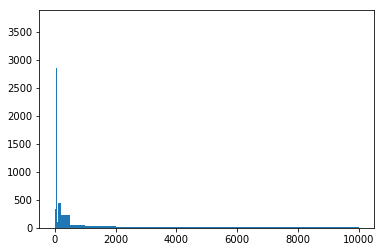

In [157]:
histdata=plt.hist(ds,bins=[0,10,20,30,40,50,60,70,80,90,100,200,500,1000,2000,5000,10000])

In [158]:
histdata

(array([ 550.,   45.,  337., 1600., 2980., 3703., 2856., 1567.,  319.,
         103.,  446.,  222.,   50.,   24.,   16.,    9.]),
 array([    0,    10,    20,    30,    40,    50,    60,    70,    80,
           90,   100,   200,   500,  1000,  2000,  5000, 10000]),
 <a list of 16 Patch objects>)

In [160]:
np.sum(histdata[0]*histdata[1][:-1])/sum(histdata[1][:-1])

96.2572972972973

In [162]:
downsampled_spray_df = spray_df[spray_df.Year==2013]

In [163]:
N = downsampled_spray_df.shape[0]

In [168]:
rand_indices = np.random.choice(downsampled_spray_df.index, size=N//10, replace=False)

In [167]:
downsampled_spray_df = downsampled_spray_df.iloc[rand_indices]

Int64Index([ 2209,  2210,  2211,  2212,  2213,  2214,  2215,  2216,  2217,
             2218,
            ...
            14825, 14826, 14827, 14828, 14829, 14830, 14831, 14832, 14833,
            14834],
           dtype='int64', length=12626)

In [169]:
spray_df.shape

(14835, 8)

In [ ]:
def df_to_array(spray_df):
    new_df = spray_df.copy()
    new_df.Day = ???
    day_range = 100 to 300
    lat_range = ?? 50m resolution
    lon_rang = ?? 50m resolution
    
    spray_array = new_df.Day
    